 # Example 1 (Open Loop)

## Packages

In [15]:
using IntervalArithmetic, Plots, LaTeXStrings

*Plots backend*

In [16]:
#plotly() # for zoom
gr() # to export

Plots.GRBackend()

*Interval Arithmetic package number*

In [17]:
begin
    using Pkg
    Pkg.status("IntervalArithmetic")
end

Status `~/Desktop/GitHub_IntervalDesign/Project.toml`
⌃ [d1acc4aa] IntervalArithmetic v0.20.9
Info Packages marked with ⌃ have new versions available and may be upgradable.


# Existence

In [18]:
begin
    f(x, α, γ) = α - γ*x;
    
    local X_d = Interval(60, 70);
    local A_0 = Interval(20, 30);
    local Γ_0 = Interval(1, 2);
    
    if 0 ∈ f(X_d, A_0, Γ_0)
        println("Solution may exist.");
    else
        println("Solution does not exist.");
    end
        
end

Solution does not exist.


# Algorithm 4F [Subdivision + Contraction + Filter]

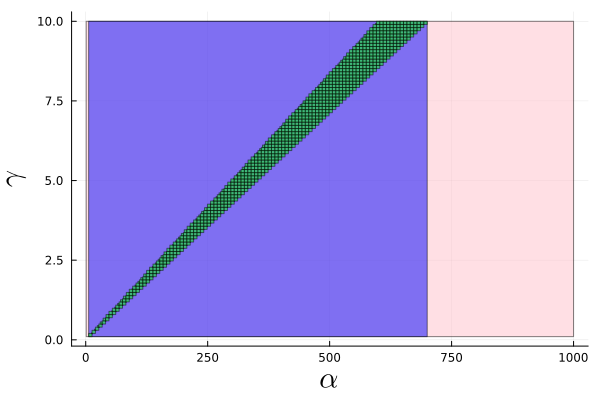

Solution exists.


In [19]:
begin
    
    f(α, γ) = α - γ*x;
    
    # Desired steady state interval
    local x = Interval(60, 70);

    # Initial parameter sets
    local α = Interval(1, 1000);
    local γ = Interval(0.1, 10);
    
    # Initialize variables
    local a1, y;
    
    # Initial box
    local P0 = IntervalBox(α, γ);
    
    # Initialize plot
    local plt = plot(xlabel=L"\alpha", ylabel=L"\gamma", tickfontsize=8, guidefontsize=20);
    plt = plot!(P0, label=false, color = :pink);

    # Specify tolerance
    local tol = 1;
    
    # Initialize solution variable
    local Solution = [];
    
    # Forward Backward Contractor
    a1 = γ*x; 
    y = (α - a1);
    y = y ∩ Interval(0, 0);
    α = (y + a1) ∩ α;
    a1 = (α - y) ∩ a1;
    γ = (a1/x) ∩ γ;
    
    # Box at first iteration
    local P1 = IntervalBox(α, γ);
    
    # Plot
    plt = plot!(P1, label=false, fc=:blue);
    
    # Existence of a solution can be determined
    if isempty(P1)
       println("Solution does not exist.");
    else
        println("Solution exists.");
    end
    
    # Parameter subdivided, m times in each direction
    local m = 100;
    local P1m = mince(P1, m);
    local αm, γm;
    local a1m, ym;
    local Pold, Pnew;
    
    # Plot
    #plt = plot!(P1m, label=false, fc=:blue);

    for i in 1:m^2
        αm, γm = P1m[i];
                
        Pold = P1m[i];
        
        while 0 ∈ f(Pold...) # Using a bisection like condition to rule out grids
        
            # Forward Backward Contractor
            a1m = γm*x; 
            ym = αm - a1m;
            ym = ym ∩ Interval(0, 0);
            αm = (ym + a1m) ∩ αm;
            a1m = (αm - ym) ∩ a1m;
            γm = (a1m/x) ∩ γm;


            Pnew = IntervalBox(αm, γm);
            
            # May not be needed if solution already there
            # Break if parameter grid is not empty
            if isempty(Pnew)
                
                break;
                
            end

            # Break if there is not much change in P
            if diam(Pold) - diam(Pnew) < tol
        
                # Plot
                plt = plot!(Pnew, label=false, fc = :lime);
                
                #push!(Solution, Pnew); # save
                push!(Solution, Pnew);
                                
                break;
    
            end

            
            Pold = Pnew;
            
        end
        
    end

    display(plt);
    
    # savefig(plt, "Ex1_CSF.pdf");

end

# Algorithm 2 [Subdivision + Filter]

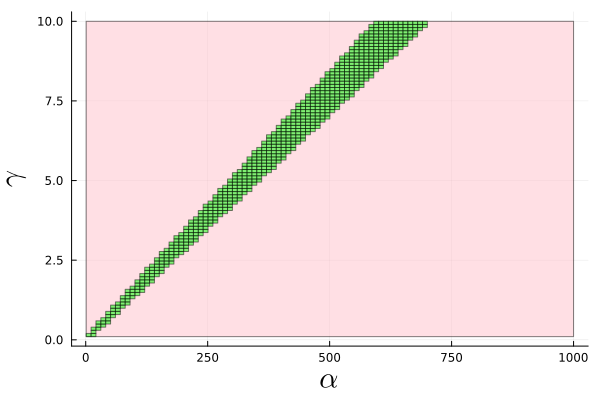

In [20]:
begin
    f(α, γ) = α - γ*x;
    
    # Desired steady state interval
    local x = Interval(60, 70);

    # Initial parameter sets
    local α = Interval(1, 1000);
    local γ = Interval(0.1, 10);
        
    # Initial box
    local P0 = IntervalBox(α, γ);
    
    # Specify tolerance
    local tol = 1/2;
    
    # Initialize solution variable
    local S = [];
    
    # Initialize plot
    local plt = plot(xlabel=L"\alpha", ylabel=L"\gamma", tickfontsize=8, guidefontsize=20);
    plt = plot!(P0, label = false, color = :pink);
    
    # Parameter Subdivision
    local m = 100;
    local P0m = mince(P0, m);

    # Solution =
    # Filter via Non-Existence Criterion
    Solution_Set = filter(p -> (0 ∈ f(p...)), P0m);
    
    # Plot
    plt = plot!(Solution_Set, c = :lime, label = false);
    display(plt);
    # savefig(plt, "Ex1_SF.pdf");
end